# Some Quick Visuals on the Climate Data.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import pandas as pd
import datetime

In [2]:
climate = pd.read_csv('C:/Users/sixte/University of Toronto/ClimateDataMonthly/all_filtered_monthly.csv')

For the single station we pick Big Trout Lake Weather Station, located by the Kitchenuhmaykoosib Inninuwug First Nation in North-Western Ontario.

In [3]:
btl = climate[climate['Station ID'] == '6010740']

A plot of the mean temperature the last years show a clear trend.

C:\Users\sixte\AppData\Local\Temp\ipykernel_20688\4206069589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btl['Date'] = pd.to_datetime(btl['Date'])


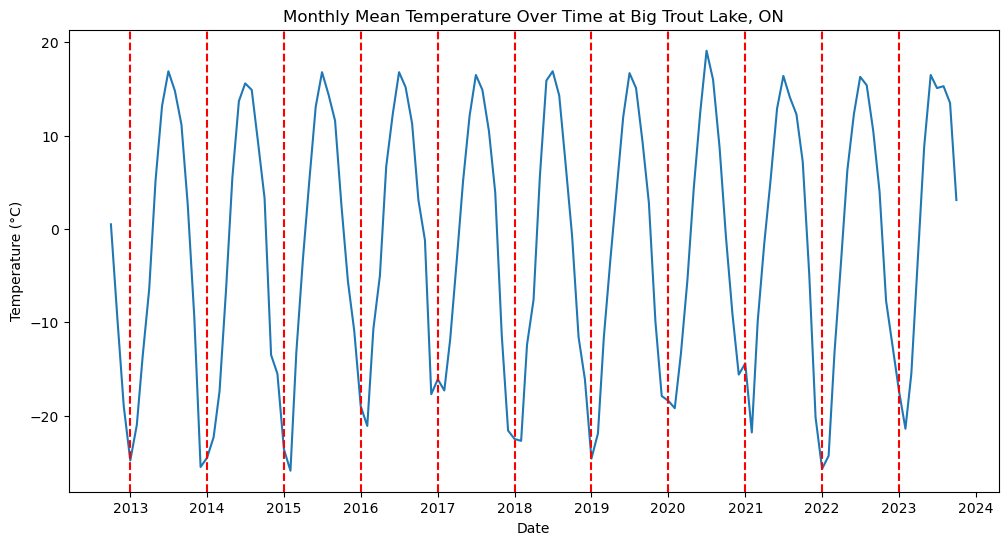

In [11]:
btl['Date'] = pd.to_datetime(btl['Date'])
plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='Tm', data=btl)

for year in range(2013, 2024):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='red', linestyle='--')

plt.title("Monthly Mean Temperature Over Time at Big Trout Lake, ON")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

plt.gca().xaxis.set_major_locator(YearLocator())
plt.savefig('temp_mean_btl.png')
plt.show()


For the percipitation we see there is also a pattern, but more variance.

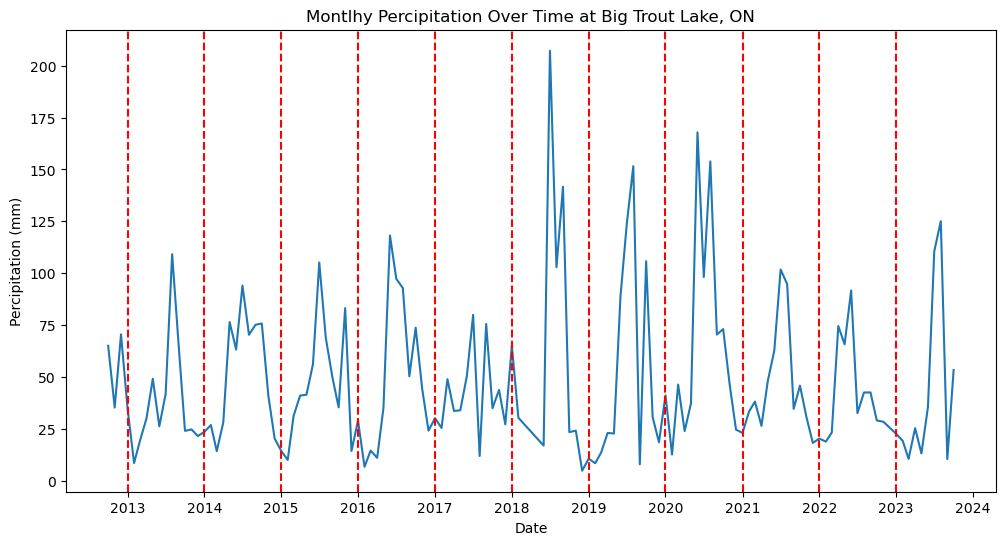

In [12]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='P', data=btl)

for year in range(2013, 2024):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='red', linestyle='--')

plt.title("Montlhy Percipitation Over Time at Big Trout Lake, ON")
plt.xlabel("Date")
plt.ylabel("Percipitation (mm)")

plt.gca().xaxis.set_major_locator(YearLocator())

plt.savefig('perc_btl.png')
plt.show()


Now we check for all data. There are some problems with doing this, as stations are much tighter together in southern Ontario where more people live. One way to deal with this could be to decluster the station data, giving weights to the measurements in relation to how much area each station covers. Although, this still wouldn't give a fair representation of the means for Ontario as a whole. For now, we just have to make sure we do not over interpret based on our findings below.

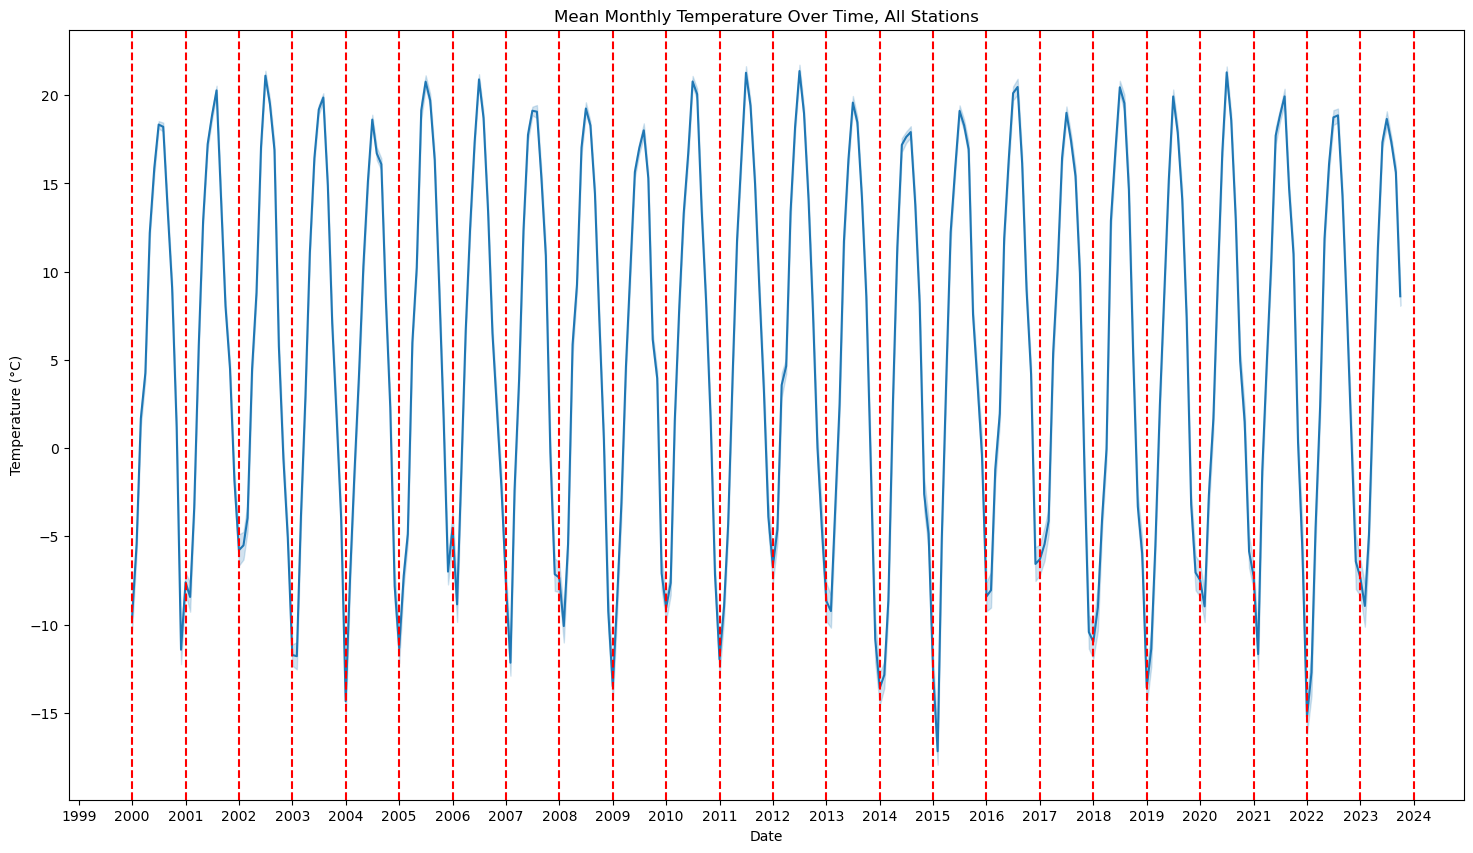

In [13]:
climate['Date'] = pd.to_datetime(climate['Date'])

plt.figure(figsize=(18, 10))

sns.lineplot(x = 'Date', y = 'Tm', estimator= 'mean', data = climate)

for year in range(2000, 2025):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='red', linestyle='--')

plt.title("Mean Monthly Temperature Over Time, All Stations")

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

plt.gca().xaxis.set_major_locator(YearLocator(1))

plt.savefig('temp_mean_all.png')
plt.show()


Looking at the plot below, we see the same trend as at Big Trout Lake. The yearly variability in percipitation levels are much larger than that of temperature.

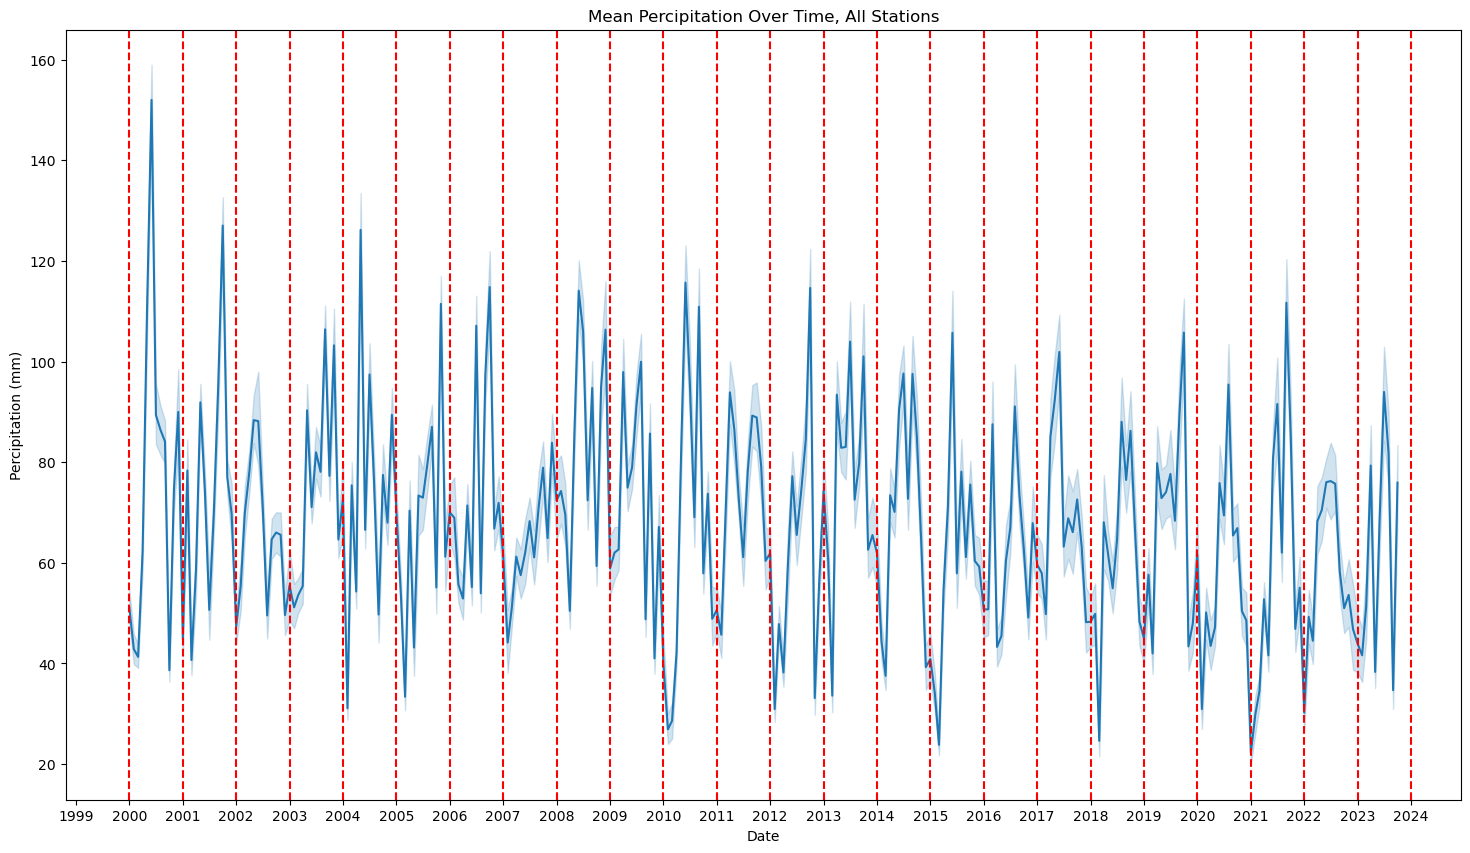

In [14]:
climate['Date'] = pd.to_datetime(climate['Date'])

plt.figure(figsize=(18, 10))

sns.lineplot(x = 'Date', y = 'P', estimator= 'mean', data = climate)

for year in range(2000, 2025):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='red', linestyle='--')

plt.title("Mean Percipitation Over Time, All Stations")
plt.xlabel("Date")
plt.ylabel("Percipitation (mm)")

plt.gca().xaxis.set_major_locator(YearLocator())
plt.savefig('perc_all.png')
plt.show()
